## Sensor Finding

Sensor finding will be done using normalized cross-correlation on a predetermined sensor kernel
The window kernel will be calibrated from the UI.

In [3]:
import numpy as np
import cv2
from skimage.io import imshow
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import scipy

Load the images

In [4]:
input_image = cv2.imread('testgold2.jpg')
kernel_image = cv2.imread("output.png")

input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
kernel_image = cv2.cvtColor(kernel_image, cv2.COLOR_BGR2GRAY)

Normalize the images

In [5]:
norm_a = np.linalg.norm(input_image)
a = input_image / norm_a
norm_b = np.linalg.norm(kernel_image)
b = kernel_image / norm_b
b -= b.mean()
a -= a.mean()

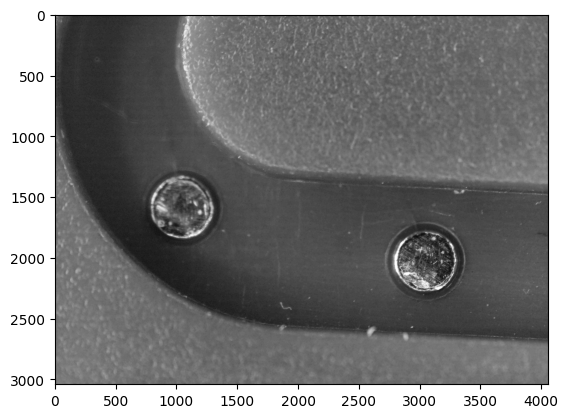

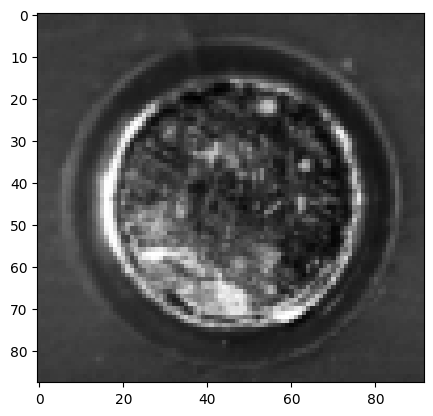

In [6]:
plt.figure(1)
plt.imshow(a, cmap='gray')
plt.figure(2)
plt.imshow(b, cmap='gray')

In [7]:
a = cv2.GaussianBlur(input_image, (21, 21), 300)
b = cv2.GaussianBlur(kernel_image, (21, 21), 300)

kernel = np.ones((12, 12), np.uint8)

ret, axy = cv2.threshold(a, 146, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, bxy = cv2.threshold(b, 146, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

axy = cv2.erode(axy, kernel, cv2.BORDER_REFLECT)
bxy = cv2.erode(bxy, kernel, cv2.BORDER_REFLECT) 

In [8]:
print(input_image.shape)

(3040, 4056)


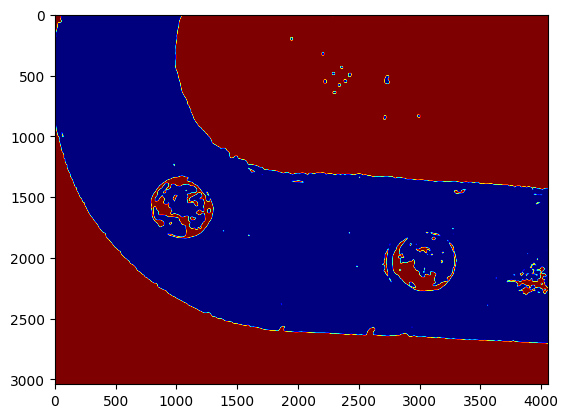

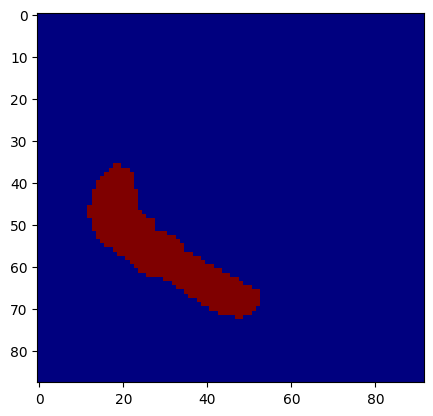

In [9]:
plt.figure(1)
plt.imshow(axy, cmap='jet')
plt.figure(2)
plt.imshow(bxy, cmap='jet')

Perform the cross correlation in Fourier space

In [10]:
a_ft = np.fft.fftshift(scipy.fftpack.fft2(input_image))
b_ft = np.fft.fftshift(scipy.fftpack.fft2(kernel_image))

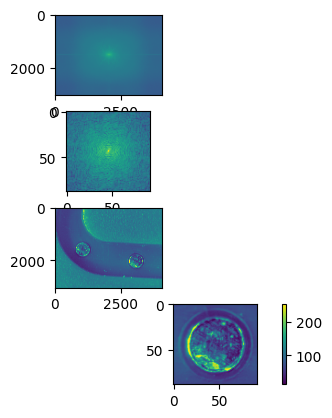

In [24]:
plt.subplot(4, 1, 1)
plt.imshow(np.abs(a_ft), norm=LogNorm(vmin=5))
plt.subplot(4, 1, 2)
plt.imshow(np.abs(b_ft), norm=LogNorm(vmin=5))
plt.subplot(4, 1, 3)
plt.imshow(input_image)
plt.subplot(4, 1, 4)
plt.imshow(kernel_image)
plt.colorbar()

In [12]:
ft_corr = scipy.signal.fftconvolve(a, b.transpose())

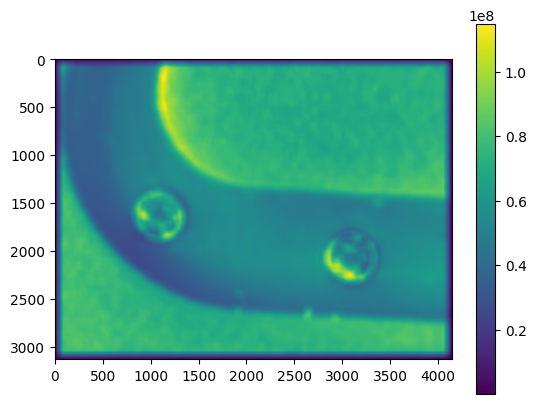

In [13]:
plt.imshow(ft_corr)
plt.colorbar()

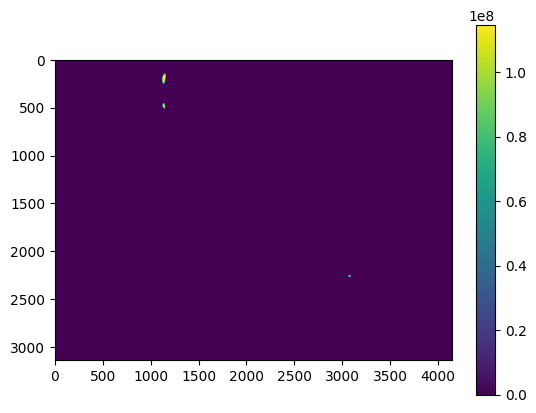

In [29]:
peaks = ft_corr.copy()
peaks[peaks < 0.97 * peaks.max()] = 0
plt.imshow(peaks)
plt.colorbar()

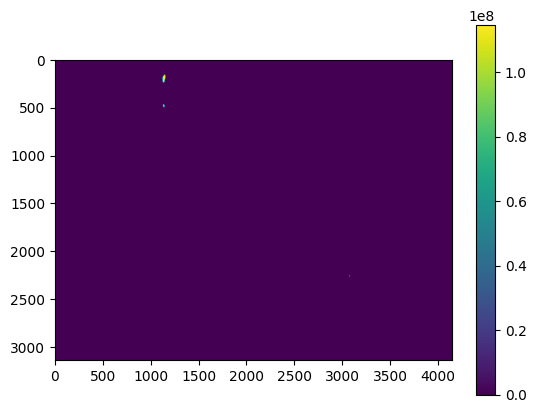